# Real-Time Test

### Import Libraries

In [123]:
import pickle
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [124]:
PrototypeModel = pickle.load(open('PickledModels/GaussianNB', 'rb'))

In [125]:
x, Fs = librosa.load('RawData/Recording1.wav')

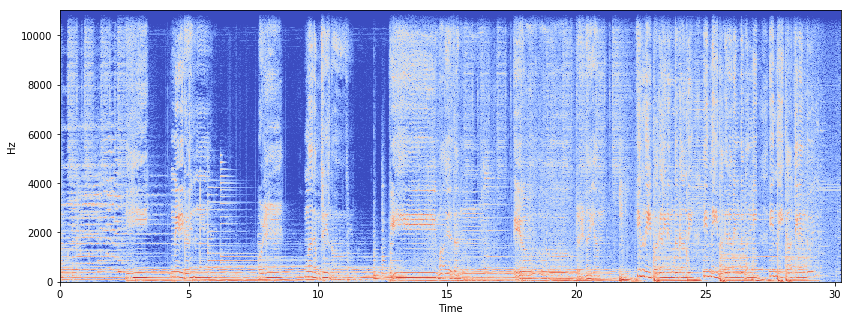

In [126]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='hz')

In [127]:
import IPython.display as ipd
import math
import numpy as np

In [128]:
ipd.Audio(x, rate = Fs)

In [129]:
import pyaudio
import wave
import time

CHUNK = 1024
wf    = wave.open('RawData/Recording1.wav', 'rb')
p     = pyaudio.PyAudio()

In [130]:
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)

data = wf.readframes(CHUNK)
while len(data) > 0:
    stream.write(data)
    data = wf.readframes(CHUNK)
    rawframe = np.frombuffer(data, dtype=np.int16)
    print(rawframe, end='\r', flush=True)
stream.stop_stream()
stream.close()
p.terminate() 